<a href="https://colab.research.google.com/github/ahnafia/Learning_Pytorch/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
#Convert MNIST Image Files into a 4 dimensional tensor
transform = transforms.ToTensor()

In [48]:
#Training our data
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

In [49]:
#Testing our data
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [50]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [51]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) #Creating a 10 batch data load
test_loader = DataLoader(test_data, batch_size=10, shuffle=False) #Creating a 10 batch data load

In [52]:
#Creating and setting the CNN Model, only having 2 layers here
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)

In [53]:
#Using a image
for i, (X_train, y_train) in enumerate(loader):
    break

In [54]:
x = X_train.view(10, 1, 28, 28) #Setting the tensor to the size of X_train

In [55]:
#Applying the first convolution
x = F.relu(conv1(x))
x.shape

torch.Size([10, 6, 28, 28])

In [56]:
#Pooling layer
x = F.max_pool2d(x, 2, 2) #kernel=2, stride=2
x.shape

torch.Size([10, 6, 14, 14])

In [57]:
#Applying the second convolution
x = F.relu(conv2(x))
x.shape

torch.Size([10, 16, 14, 14])

In [58]:
# Second Pooling layer
x = F.max_pool2d(x, 2, 2) #kernel=2, stride=2
x.shape

torch.Size([10, 16, 7, 7])

In [59]:
class ConvoloutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(6, 16, 3 , 1)
    #Fully connected layers
    self.fc1 = nn.Linear(in_features=6*6*16, out_features=120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)
    #Flatten data by reviewing
    X = X.view(-1, 6*6*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [60]:
#Creating instance of CNN
torch.manual_seed(101)
model = ConvoloutionalNetwork()
model

ConvoloutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [61]:
#Loss function and optomizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [63]:
#Variables to track
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#Running epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train) #Get training predicted value
    loss = criterion(y_pred, y_train) #Calculate loss
    predicted = torch.max(y_pred.data, 1)[1] #Get predicted class
    batch_corr = (predicted == y_train).sum() #Number of correct predictions
    trn_corr += batch_corr
    #Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'Epoch {i}  Batch {b}  Loss {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Testing
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

  print(f'Epoch {i}  Train Loss: {train_losses[-1].item()}  Train Accuracy: {train_correct[-1].item()}  Test Loss: {test_losses[-1].item()}  Test Accuracy: {test_correct[-1].item()}')

Epoch 0  Batch 600  Loss 0.26586613059043884
Epoch 0  Batch 1200  Loss 0.013712340965867043
Epoch 0  Batch 1800  Loss 0.2968384623527527
Epoch 0  Batch 2400  Loss 0.15323808789253235
Epoch 0  Batch 3000  Loss 0.043587010353803635
Epoch 0  Batch 3600  Loss 0.1187116876244545
Epoch 0  Batch 4200  Loss 0.030455831438302994
Epoch 0  Batch 4800  Loss 0.07084570825099945
Epoch 0  Batch 5400  Loss 0.4851313531398773
Epoch 0  Batch 6000  Loss 0.025189116597175598
Epoch 0  Train Loss: 0.025189116597175598  Train Accuracy: 56246  Test Loss: 0.0008671828545629978  Test Accuracy: 9783
Epoch 1  Batch 600  Loss 0.0023277117870748043
Epoch 1  Batch 1200  Loss 0.0006136649171821773
Epoch 1  Batch 1800  Loss 0.09667106717824936
Epoch 1  Batch 2400  Loss 0.16505677998065948
Epoch 1  Batch 3000  Loss 0.022626269608736038
Epoch 1  Batch 3600  Loss 0.003416046965867281
Epoch 1  Batch 4200  Loss 0.0013142996467649937
Epoch 1  Batch 4800  Loss 0.0014378796331584454
Epoch 1  Batch 5400  Loss 0.014258262701332

In [64]:
test_data[20]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

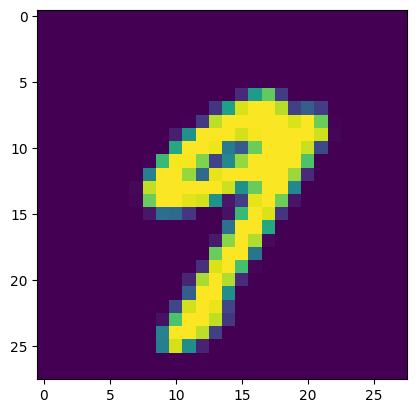

In [67]:
#Grabbing the data for the image
image = test_data[20][0]
plt.imshow(image.reshape(28, 28))

In [68]:
#Passing through the image
model.eval()
with torch.no_grad():
  test = model(image.view(1, 1, 28, 28))

  print(test.argmax())

tensor(9)
